# Dataset plotting presentation
Tasks:
1. Read the dataset
2. Drop duplicates
3. Drop null values consisting of corresponding rows/columns
4. Replace null values with zero/mean/median/mode
5. Scatter plot with and without hue
6. KDE plot with and without hue
7. Histogram with and without hue
8. Boxplot of all the features
9. Detect outliers with boxplot

### Read the dataset

In [1]:
# import pandas
import pandas as pd

In [2]:
#Read the dataset and store it in a dataframe
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

### Drop duplicates

In [3]:
df.Loan_ID.duplicated().sum() #check duplicate for Loan_ID column

0

In [4]:
df.duplicated().sum()

0

### Drop null values consisting of corresponding rows/columns

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Replace null values with zero/mean/median/mode

In [6]:
df_mode = df
df_mode['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df_mode['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df_mode['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df_mode['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df_mode['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df_mode.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_median = df
df_median['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df_median['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df_median.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Scatter plot with and without hue

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

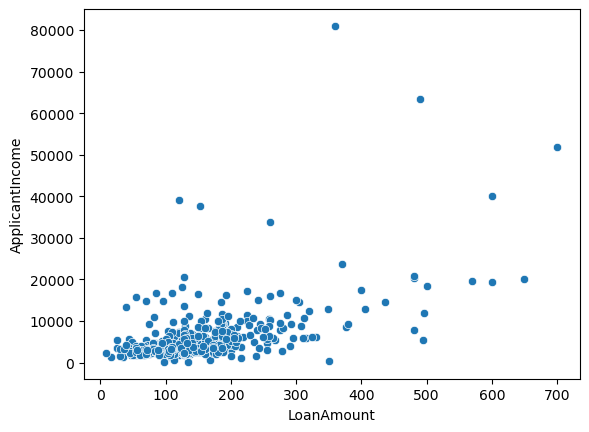

In [9]:
sns.scatterplot(data=df_median, y='ApplicantIncome', x='LoanAmount')

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

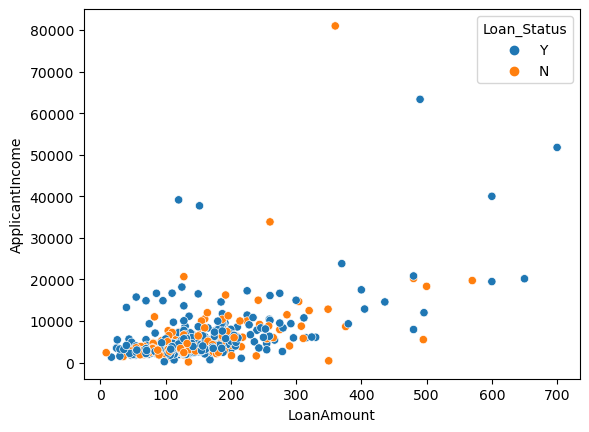

In [10]:
sns.scatterplot(data=df_median,y='ApplicantIncome',x='LoanAmount', hue='Loan_Status')

### KDE plot with and without hue

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

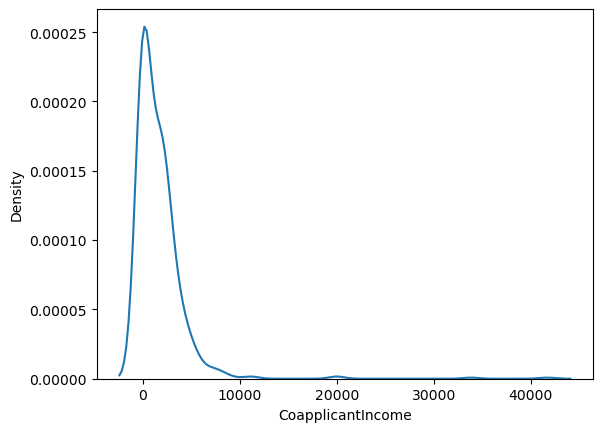

In [11]:
sns.kdeplot(x = 'CoapplicantIncome', data = df_median)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

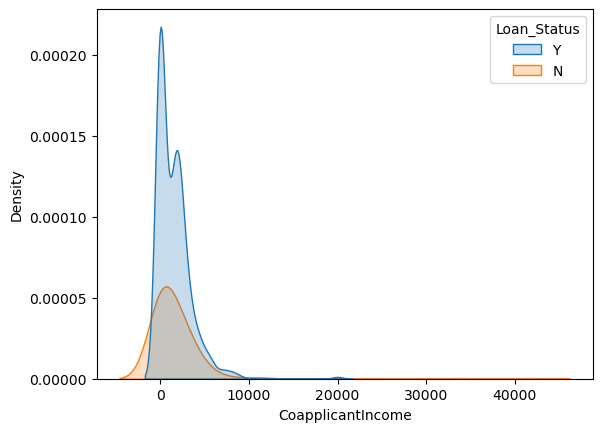

In [12]:
sns.kdeplot(x = 'CoapplicantIncome', data = df_median, shade = True, hue = 'Loan_Status')

### Histogram with and without hue

In [13]:
df_median['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

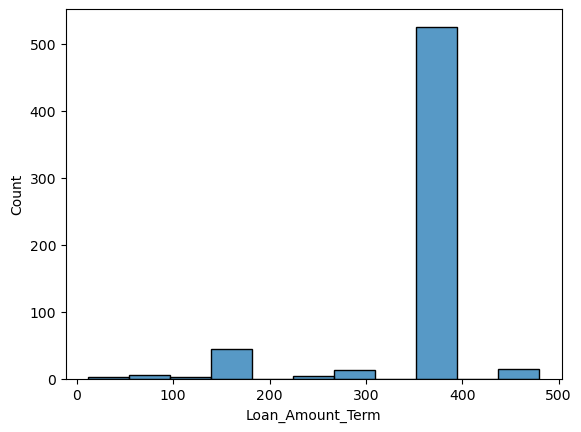

In [14]:
sns.histplot(x = 'Loan_Amount_Term', data = df_median);

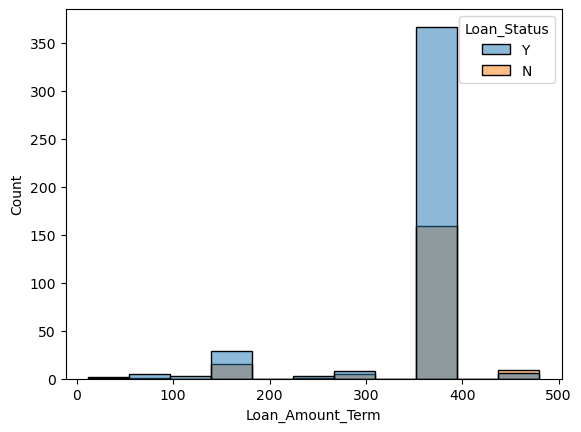

In [15]:
sns.histplot(x = 'Loan_Amount_Term', data = df_median, hue='Loan_Status');

### Boxplot of all the features

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Gender'>

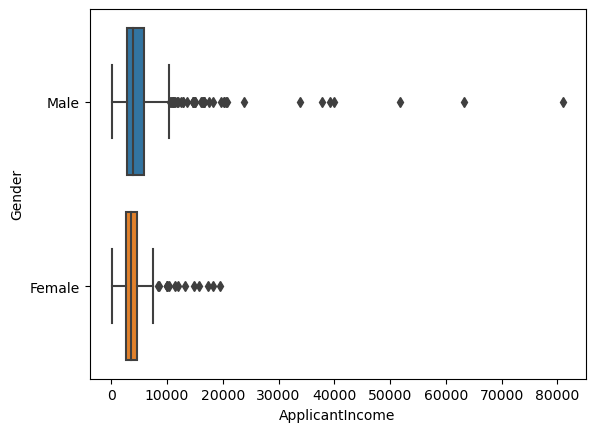

In [16]:
sns.boxplot(x= 'ApplicantIncome', y = 'Gender', data = df_median)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Married'>

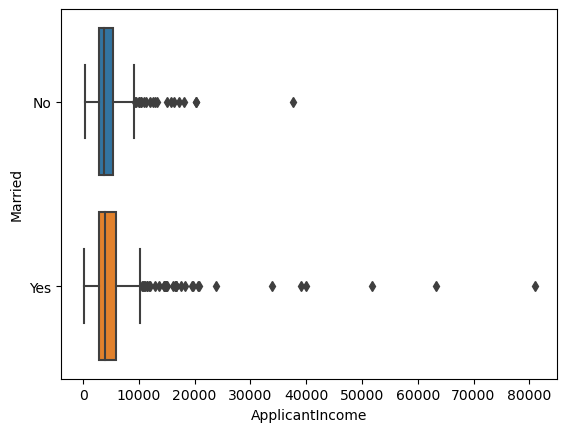

In [17]:
sns.boxplot(x= 'ApplicantIncome', y = 'Married', data = df_median)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Dependents'>

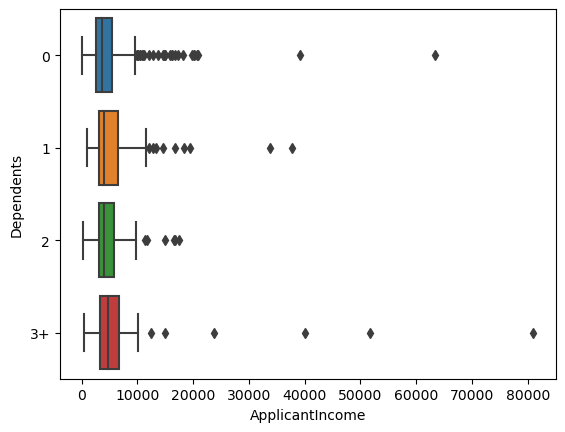

In [18]:
sns.boxplot(x= 'ApplicantIncome', y = 'Dependents', data = df_median)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Self_Employed'>

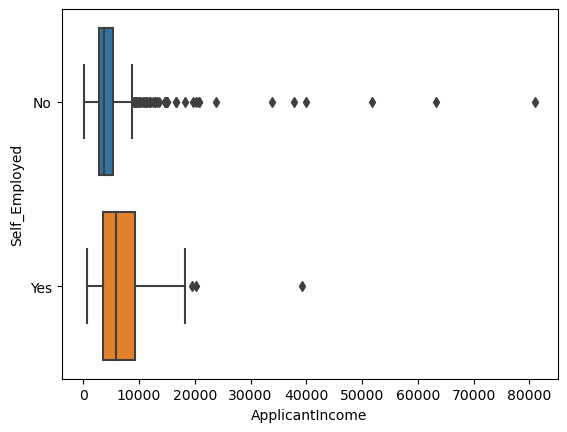

In [19]:
sns.boxplot(x= 'ApplicantIncome', y = 'Self_Employed', data = df_median)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>

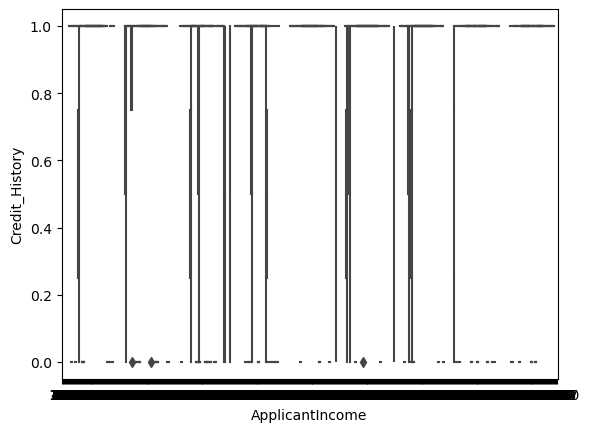

In [20]:
sns.boxplot(x= 'ApplicantIncome', y = 'Credit_History', data = df_median)

### Detect outliers with boxplot

In [21]:
# implementation of the Tukey's algorithm
# values that look different from the other values in the data
# Box plots are a visual method to identify outliers
def findOutliers(dataset):
    outliers = []
    Q2 = dataset.median()
    Q1 = dataset.describe()[4]
    Q3 = dataset.describe()[6]
    
    # Q1 = dataset.quantile(0.25)
    # Q3 = dataset.quantile(0.75)
    
    # 
    
    IQR = Q3 - Q1
    lf = Q1 - 1.5*IQR # lf = lower fence
    uf = Q3 + 1.5*IQR # Uf = Upper fence
    for x in dataset:
        if x < lf or x > uf:
            outliers.append(x)
    return outliers

In [22]:
df_median.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

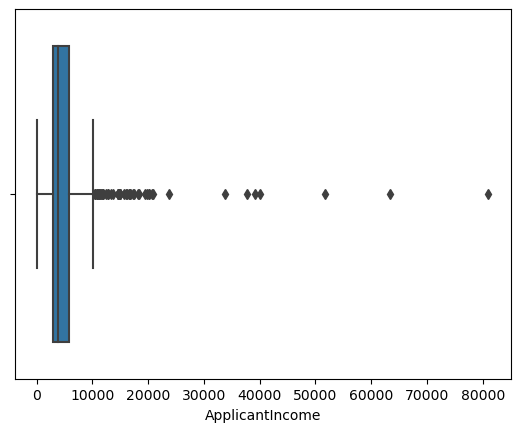

In [23]:
sns.boxplot(x = 'ApplicantIncome', data = df_median)
findOutliers(df_median['ApplicantIncome'])

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

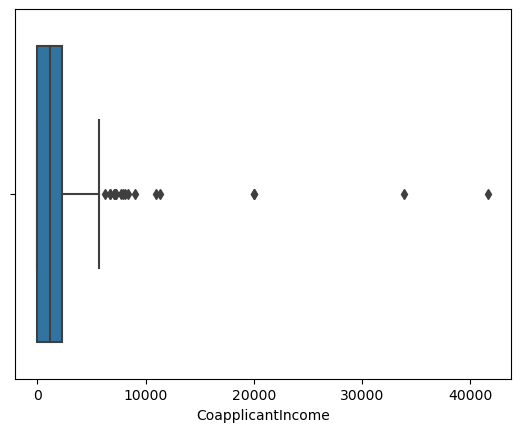

In [24]:
sns.boxplot(x = 'CoapplicantIncome', data = df_median)
findOutliers(df_median['CoapplicantIncome'])

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

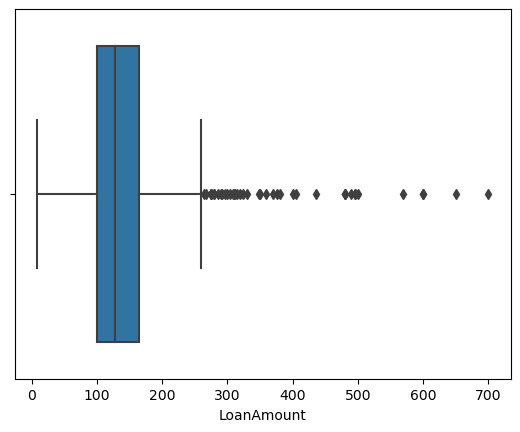

In [25]:
sns.boxplot(x = 'LoanAmount', data = df_median)
findOutliers(df_median['LoanAmount'])

[120.0,
 240.0,
 180.0,
 180.0,
 60.0,
 300.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

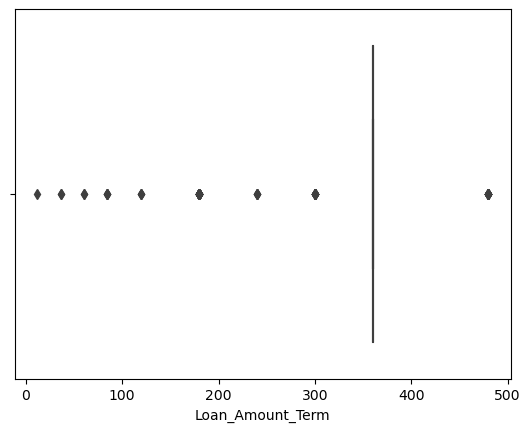

In [26]:
sns.boxplot(x = 'Loan_Amount_Term', data = df_median)
findOutliers(df_median['Loan_Amount_Term'])